In [1]:
#USING SVM IN CNN: RCNN

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5 #50%GPU shared memory
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Part 1 - Data Preprocessing
# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [4]:
training_set = train_datagen.flow_from_directory('Downloads/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',subset="training")
# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.9)
test_set = test_datagen.flow_from_directory('Downloads/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical',subset="validation")
#Question: Why didnt you use image train_datagen for the test as well? Why no augmentation in test apart from rescale?

Found 777 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


In [5]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense #add nodes
from tensorflow.keras.regularizers import l2

In [6]:
# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential() 

# Step 1 - Convolution 
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #as 2D image

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [7]:
#Output and Compiler (SVM)
cnn.add(Dense(4, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation ='softmax'))  #l2 norm and can be 0.001 also
cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [8]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 5

In [9]:
# Part 3 - Training the CNN
# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 100)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
 1/25 [>.............................] - ETA: 0s - loss: 1.4000 - accuracy: 0.1875

C:\Users\pavit\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 99 bytes but only got 74. Skipping tag 45059
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\pavit\anaconda3\lib\site-packages\PIL\JpegImagePlugin.py:795: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


25/25 [==============================] - ETA: 0s - loss: 1.2407 - accuracy: 0.5367WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000020A8081B1F8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
25/25 [==============================] - 208s 8s/step - loss: 1.2407 - accuracy: 0.5367 - val_loss: 1.3430 - val_accuracy: 0.2778
Epoch 2/100
2

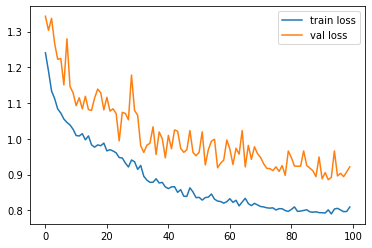

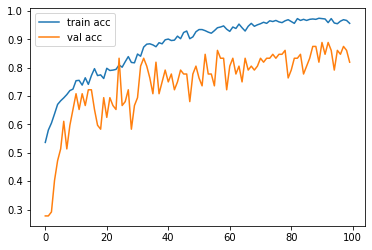

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('Loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('Acc')

In [ ]:
#loss functions and regularization parameters change is the main change than a normal CNN